In [ ]:
#!pip install --upgrade tensorflow scikit-learn


In [ ]:
#!pip install --upgrade scikeras

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam, Nadam,Adamax,Adagrad,RMSprop,SGD,Adadelta
from keras.layers import Input, Dense, Dropout, BatchNormalization


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_churn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv")
df_churn.shape
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df_churn.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
df_churn.info()   #datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_churn.isna().sum()    #total null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
duplicated_rows = df_churn.loc[df_churn.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


1. Extracting the relevant features that can define a customer churn# New Section

In [ ]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')   #object to numerical values, as TotalCharges should be

df_churn['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
#separating numeric and object data
numerical_data = df_churn.select_dtypes(exclude = ["object"])
object_data = df_churn.select_dtypes(include = ["object"])

numerical_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [ ]:
numerical_data.nunique()    #checking the unique values

SeniorCitizen        2
tenure              73
MonthlyCharges    1585
TotalCharges      6530
dtype: int64

In [ ]:
# SeniorCitizen is a categorical data, so it should be excluded from numerical data
object_data["SeniorCitizen"] = numerical_data["SeniorCitizen"]
numerical_data = numerical_data.drop("SeniorCitizen", axis=1)

numerical_data

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [ ]:
object_data.nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
SeniorCitizen          2
dtype: int64

In [ ]:
object_data.drop("customerID", axis=1, inplace=True)   # Dropping customerID column because it is unique throughout

In [ ]:
object_data.nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
SeniorCitizen       2
dtype: int64

In [ ]:
# Scaling our data
scaler = StandardScaler()

numerical_scaled = scaler.fit_transform(numerical_data)
df_scaled = pd.DataFrame(numerical_scaled, columns = numerical_data.columns)
df_scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994194
1,0.066327,-0.259629,-0.173740
2,-1.236724,-0.362660,-0.959649
3,0.514251,-0.746535,-0.195248
4,-1.236724,0.197365,-0.940457
...,...,...,...
7038,-0.340876,0.665992,-0.129180
7039,1.613701,1.277533,2.241056
7040,-0.870241,-1.168632,-0.854514
7041,-1.155283,0.320338,-0.872095


In [ ]:
import pickle

with open('scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)

In [ ]:
# factorizing data

for column in object_data.columns:
  object_data[column], _ = pd.factorize(object_data[column])



In [ ]:
# merging categorical and numerical data

merged_df = pd.concat([object_data, df_scaled], axis = 1)
merged_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.277445,-1.160323,-0.994194
1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0,0,0.066327,-0.259629,-0.173740
2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,-1.236724,-0.362660,-0.959649
3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0,0,0.514251,-0.746535,-0.195248
4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,-1.236724,0.197365,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,0,0,-0.340876,0.665992,-0.129180
7039,0,0,1,1,2,1,0,0,1,0,1,1,1,0,3,0,0,1.613701,1.277533,2.241056
7040,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,-0.870241,-1.168632,-0.854514
7041,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,1,1,-1.155283,0.320338,-0.872095


In [ ]:
#checking the null valuse

merged_df.isna().sum()

gender               0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Churn                0
SeniorCitizen        0
tenure               0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [ ]:
# Filling the null values with mean

merged_df = merged_df.fillna(merged_df.mean())
merged_df.isna().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
SeniorCitizen       0
tenure              0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
# Splitting data into training and testing datasets

X = merged_df.drop('Churn', axis=1)
y = merged_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Measuring feature importance using RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
18,TotalCharges,0.190619
17,MonthlyCharges,0.175701
16,tenure,0.157202
12,Contract,0.072470
14,PaymentMethod,0.058026
6,OnlineSecurity,0.049096
9,TechSupport,0.040379
0,gender,0.027881
13,PaperlessBilling,0.025313
7,OnlineBackup,0.024190


In [ ]:
trainable_columns = feature_importance_df.Feature[:10]

In [ ]:
# Choosing the most important columns to use train our model

trainable_data = merged_df[trainable_columns]
trainable_data.head()

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity,TechSupport,gender,PaperlessBilling,OnlineBackup
0,-0.994194,-1.160323,-1.277445,0,0,0,0,0,0,0
1,-0.173740,-0.259629,0.066327,1,1,1,0,1,1,1
2,-0.959649,-0.362660,-1.236724,0,1,1,0,1,0,0
3,-0.195248,-0.746535,0.514251,1,2,1,1,1,1,1
4,-0.940457,0.197365,-1.236724,0,0,0,0,0,0,1


In [ ]:
X = trainable_data
X

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity,TechSupport,gender,PaperlessBilling,OnlineBackup
0,-0.994194,-1.160323,-1.277445,0,0,0,0,0,0,0
1,-0.173740,-0.259629,0.066327,1,1,1,0,1,1,1
2,-0.959649,-0.362660,-1.236724,0,1,1,0,1,0,0
3,-0.195248,-0.746535,0.514251,1,2,1,1,1,1,1
4,-0.940457,0.197365,-1.236724,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,-0.129180,0.665992,-0.340876,1,1,1,1,1,0,1
7039,2.241056,1.277533,1.613701,1,3,0,0,0,0,0
7040,-0.854514,-1.168632,-0.870241,0,0,1,0,0,0,1
7041,-0.872095,0.320338,-1.155283,0,1,0,0,1,0,1


In [ ]:
trainable_data.columns

Index(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod',
       'OnlineSecurity', 'TechSupport', 'gender', 'PaperlessBilling',
       'OnlineBackup'],
      dtype='object')

2. Exploratory Data Analysis to find out which customer profiles relate to churning a lot.

In [ ]:
eda_df= pd.concat([trainable_data, y], axis=1)


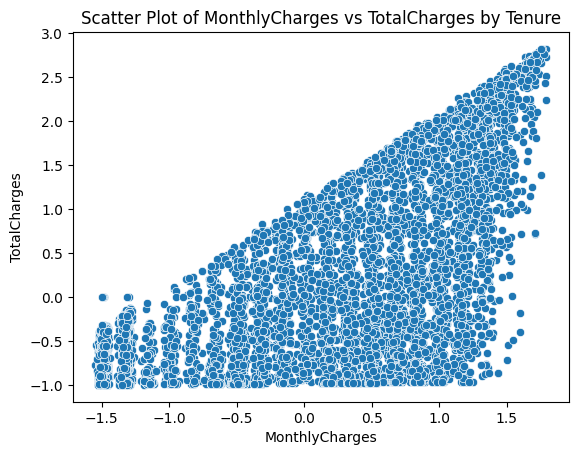

In [ ]:
# Visualize the distribution of the target variable (Churn)

sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=trainable_data)
plt.title('Scatter Plot of MonthlyCharges vs TotalCharges by Tenure')
plt.show()

EDA


In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")


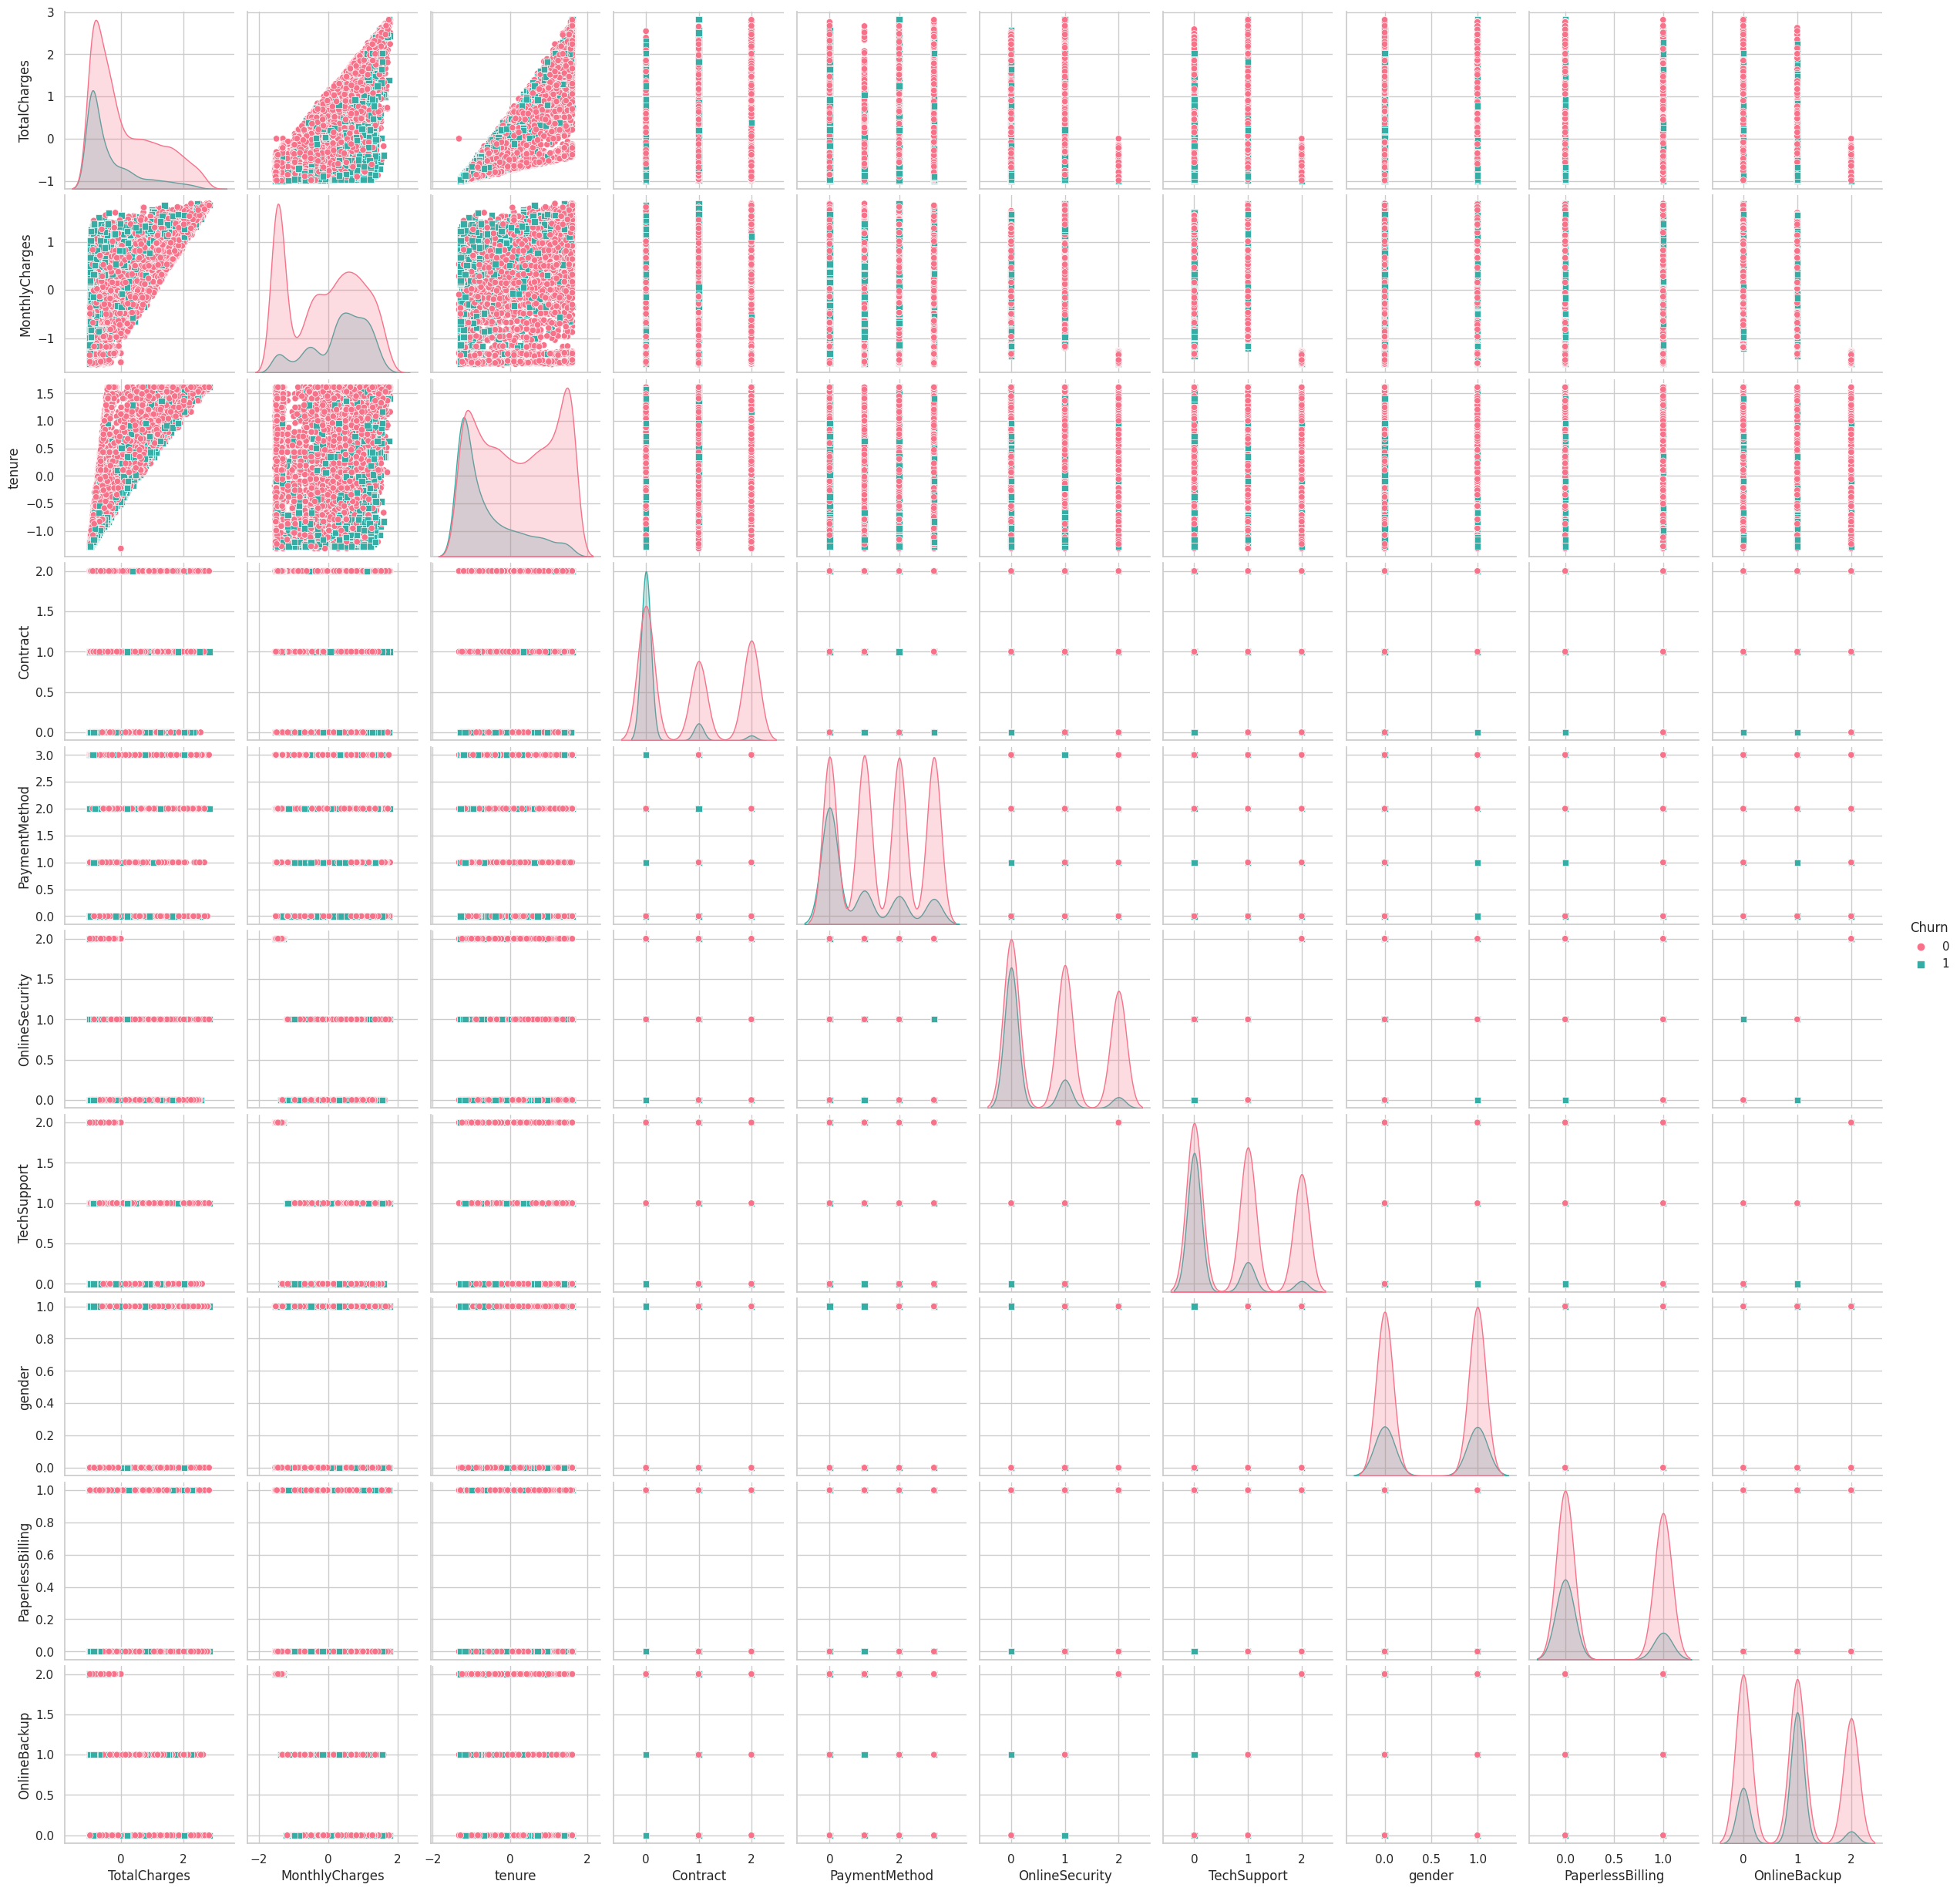

In [ ]:
# Pairplot to visualize relationships between numerical features and churn
sns.pairplot(eda_df, hue='Churn', markers=["o", "s"], palette="husl")
plt.show()


Using the features in (1) to define and train a Multi-Layer Perceptron model using the Functional API

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# The function to create the model

def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(64, input_dim=len(trainable_data.columns), activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
# Defining the MLPClassifier
mlp_classifier = MLPClassifier(max_iter=100, random_state=42)

In [ ]:
# The hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(64,), (32,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

In [ ]:
# Creating GridSearchCV
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fitting the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64,), solver=adam; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64,), solver=adam; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64,), solver=adam; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64,), solver=sgd; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64,), solver=sgd; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64,), solver=sgd; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(32,), solver=adam; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(32,), solver=adam; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(32,), solver=adam; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(32,), solver=sgd; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(32,), solver=sgd; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(32,), solver=sgd; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64,), solver=adam; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64,), solver=adam; total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64,), solver=adam; total time=   3.6s
[CV] END activation=tanh, hidden_layer_sizes=(64,), solver=sgd; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=(64,), solver=sgd; total time=   2.4s
[CV] END activation=tanh, hidden_layer_sizes=(64,), solver=sgd; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(32,), solver=adam; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(32,), solver=adam; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(32,), solver=adam; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(32,), solver=sgd; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(32,), solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(32,), solver=sgd; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(64,), (32,)],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=2)

In [ ]:
# Checking the best parameters and best accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (64,), 'solver': 'adam'}
Best Accuracy: 80.21%


In [ ]:
# The hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(64,)],
    'activation': ['tanh'],
    'solver': ['adam']
}

In [ ]:
# Creating GridSearchCV
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fitting the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64,), solver=adam; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64,), solver=adam; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64,), solver=adam; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=42),
             param_grid={'activation': ['tanh'], 'hidden_layer_sizes': [(64,)],
                         'solver': ['adam']},
             scoring='accuracy', verbose=2)

In [ ]:
# Checking the best parameters and best accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (64,), 'solver': 'adam'}
Best Accuracy: 80.21%


4. Evaluating the model’s accuracy and calculating the AUC score

In [ ]:
# Evaluate on the test set using the best model

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 81.26%


df_churn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv")
df_churn.shape
df_churn.head()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Using the best model from GridSearchCV
best_model = grid_search.best_estimator_

In [ ]:
best_model

MLPClassifier(activation='tanh', hidden_layer_sizes=(64,), max_iter=100,
              random_state=42)

In [ ]:
# Making predictions on the test set
y_pred = best_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 81.26%


In [ ]:
# Calculate AUC score
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score: {:.4f}".format(auc_score))

AUC Score: 0.8624


In [ ]:
!pip install statsmodels

In [ ]:
# model optimisation

# checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

variance = pd.DataFrame()
variance['columns'] = X.columns
variance['variance'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]

In [ ]:
variance

,columns,variance
0,TotalCharges,10.018841
1,MonthlyCharges,4.251732
2,tenure,6.572921
3,Contract,3.711011
4,PaymentMethod,2.335397
5,OnlineSecurity,6.005742
6,TechSupport,5.969000
7,gender,1.750518
8,PaperlessBilling,1.905707
9,OnlineBackup,5.135598


In [ ]:
# dropping columns with high

threshold = 5
high_vif_columns = variance[variance['variance'] > threshold]['columns'].tolist()

print(f"Columns with VIF above {threshold}: {high_vif_columns}")


Columns with VIF above 5: ['TotalCharges', 'tenure', 'OnlineSecurity', 'TechSupport', 'OnlineBackup']


In [ ]:
trainable_data2 = X.drop(high_vif_columns, axis=1)
trainable_data2

,MonthlyCharges,Contract,PaymentMethod,gender,PaperlessBilling
0,-1.160323,0,0,0,0
1,-0.259629,1,1,1,1
2,-0.362660,0,1,1,0
3,-0.746535,1,2,1,1
4,0.197365,0,0,0,0
...,...,...,...,...,...
7038,0.665992,1,1,1,0
7039,1.277533,1,3,0,0
7040,-1.168632,0,0,0,0
7041,0.320338,0,1,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trainable_data2, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((5634, 5), (5634,))

In [ ]:
from keras import Sequential

def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(128, input_dim=len(trainable_data2.columns), activation=activation))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
model = create_model()

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train

,MonthlyCharges,Contract,PaymentMethod,gender,PaperlessBilling
2142,0.002935,1,1,0,1
1623,1.078118,2,2,0,0
6074,-1.373033,0,0,1,0
1362,0.180747,0,0,1,0
6754,-0.095111,2,2,1,0
...,...,...,...,...,...
3772,1.004999,0,0,1,0
5191,0.875378,2,3,0,0
5226,-1.449476,0,0,1,0
5390,1.152899,0,0,1,0


In [ ]:
# Fitting the model


history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
71/71 [==============================] - 2s 6ms/step - loss: 0.5186 - accuracy: 0.7397 - val_loss: 0.4448 - val_accuracy: 0.7640
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4656 - accuracy: 0.7562 - val_loss: 0.4319 - val_accuracy: 0.7844
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.7579 - val_loss: 0.4305 - val_accuracy: 0.7826
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.7593 - val_loss: 0.4350 - val_accuracy: 0.7817
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.7575 - val_loss: 0.4295 - val_accuracy: 0.7826
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4623 - accuracy: 0.7610 - val_loss: 0.4294 - val_accuracy: 0.7844
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.7613 - val_loss: 0.4295 - val_accuracy: 0.7755
Epoch 8/10
71/71 [==

5. Deploying the model

In [ ]:
model.save("Delphine_Churning_Customers_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
